In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sgemm_product.csv')

In [4]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [5]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [6]:
df.isna().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [7]:
df['Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'] )/4
data = df.copy()

In [8]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [9]:
df = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [10]:
df1 = df.sample(n=5000, random_state=0)


In [11]:
X = df1.iloc[:,:]
print(X.shape,)

(5000, 15)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
X

array([[-0.38027308,  1.16791265, -1.22117997, ..., -1.03087646,
         1.00561577,  1.74127624],
       [-1.13448388,  1.16791265,  0.81888012, ..., -1.03087646,
        -0.99441559, -0.47643727],
       [ 1.12814851, -1.49075029, -1.22117997, ..., -1.03087646,
        -0.99441559, -0.38599717],
       ...,
       [-1.13448388,  1.16791265, -1.22117997, ...,  0.97004834,
        -0.99441559, -0.46244742],
       [-0.38027308, -1.49075029, -1.22117997, ...,  0.97004834,
        -0.99441559, -0.46692417],
       [-1.13448388,  1.16791265,  0.81888012, ..., -1.03087646,
         1.00561577, -0.46152858]])

# PCA 

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [32]:
principalDf

,principal component 1,principal component 2
0,1.246787,-0.934803
1,0.436995,-2.201970
2,-0.439023,-0.289142
3,-0.194328,1.206472
4,1.467395,1.690582
...,...,...
4995,0.796589,0.832275
4996,0.688245,-0.565910
4997,-0.479153,-1.098677
4998,-0.706895,-1.749839


In [33]:
print(pca.components_)

[[ 0.43771922  0.38128465 -0.02955938 -0.11539002 -0.2059447  -0.03726163
  -0.06228276 -0.01087405  0.3620007   0.31011774  0.05017315  0.0013169
   0.01488545 -0.01321782  0.60901836]
 [ 0.39687124  0.09084425  0.07940445  0.24677475  0.3366744   0.46378859
   0.55038209  0.01690464  0.08092499 -0.34778566 -0.04537592 -0.0632468
   0.00208296 -0.01520586  0.03979406]]


In [34]:
print(pca.explained_variance_)

[1.71550944 1.42774243]


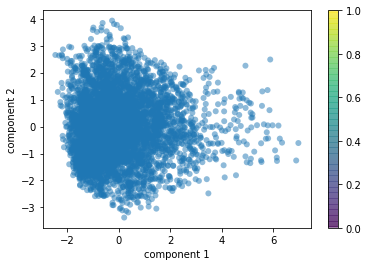

In [35]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            #c=digits.target, 
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Greens_r'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

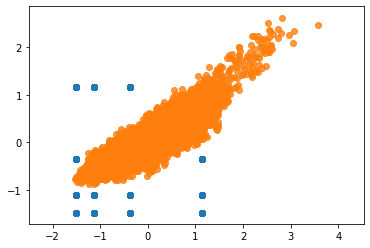

In [36]:
X_new = pca.inverse_transform(principalComponents)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# 

In [37]:
X1 = pd.DataFrame(principalDf)
X1

,principal component 1,principal component 2
0,1.246787,-0.934803
1,0.436995,-2.201970
2,-0.439023,-0.289142
3,-0.194328,1.206472
4,1.467395,1.690582
...,...,...
4995,0.796589,0.832275
4996,0.688245,-0.565910
4997,-0.479153,-1.098677
4998,-0.706895,-1.749839


In [38]:
#kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
#y_kmeans = kmeans.fit_predict(X1)

In [39]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X1)
pred_gmm = gmm.predict(X1)

In [40]:
pred_gmm

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
clustersDfg = pd.DataFrame(pred_gmm)
X1 = pd.DataFrame(X1)
clustersDfg.columns = ['cluster_predicted']
combinedDfg = pd.concat([X1, clustersDfg], axis = 1).reset_index()

In [42]:
combinedDfg = combinedDfg.drop(columns= 'index')

In [43]:
combinedDfg

,principal component 1,principal component 2,cluster_predicted
0,1.246787,-0.934803,1
1,0.436995,-2.201970,0
2,-0.439023,-0.289142,0
3,-0.194328,1.206472,2
4,1.467395,1.690582,1
...,...,...,...
4995,0.796589,0.832275,2
4996,0.688245,-0.565910,0
4997,-0.479153,-1.098677,0
4998,-0.706895,-1.749839,0


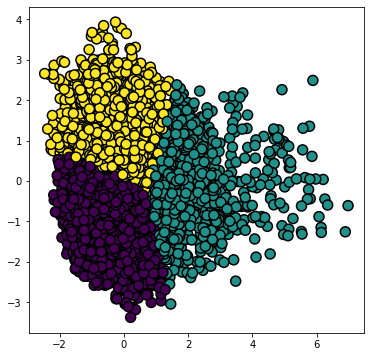

In [46]:
# Plot the clusters
plt.figure( figsize=(6,6))
plt.scatter(combinedDfg.iloc[:,0], combinedDfg.iloc[:,1], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

# ICA

In [104]:
from sklearn.decomposition import FastICA

In [156]:
fs_ica = FastICA(n_components=2,random_state=0)

In [157]:
X_transformed = fs_ica.fit_transform(X)

In [158]:
X_transformed

array([[ 1.51528585e-02, -8.62940037e-03],
       [ 9.27644166e-03, -2.48402597e-02],
       [-4.27990947e-03, -4.29502999e-03],
       ...,
       [-2.54645294e-03, -1.40937500e-02],
       [-3.92700742e-03, -2.17748140e-02],
       [-8.53558208e-05, -1.55449916e-03]])

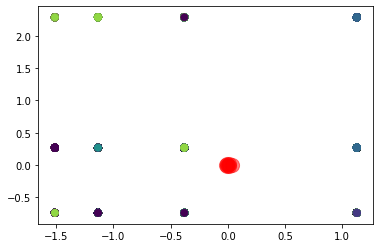

In [173]:
plt.scatter(X[:, 0], X[:, 4], c=y_kmeans1, s=50, cmap='viridis')

centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

# Random Projection

In [174]:
from sklearn import random_projection
rp = random_projection.SparseRandomProjection(n_components=3)

In [175]:
X_transformed1 = rp.fit_transform(X[:, :14])
X_transformed1

array([[ 6.08244142,  1.62277428, -3.76405074],
       [ 3.80412342, -2.29303019,  1.0695299 ],
       [ 0.87937959,  2.21918238, -2.11988742],
       ...,
       [ 2.8977675 , -0.61084005, -3.75593487],
       [-1.35523253,  2.21918238, -4.70599668],
       [-1.27995658, -0.65560664,  4.8612607 ]])

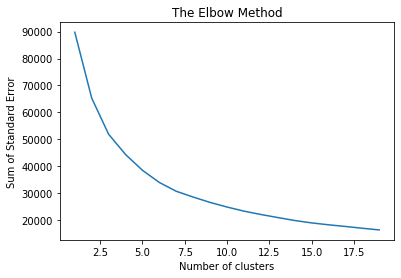

In [176]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_transformed1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Standard Error')
plt.show()

In [191]:
kmeans_2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans_2.fit_predict(X_transformed1)

In [192]:
clustersDf2 = pd.DataFrame(y_kmeans2)
X_transformed1 = pd.DataFrame(X_transformed1)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([X_transformed1, clustersDf2], axis = 1).reset_index()

In [193]:
combinedDf2 = combinedDf2.drop(columns= 'index')

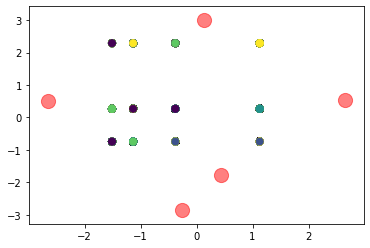

In [194]:
plt.scatter(X[:, 0], X[:, 4], c=y_kmeans2, s=50, cmap='viridis')

centers = kmeans_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);